# A basic set of tools for visualizing FESOM2.0 simulations

## Setting options

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# import standard python packages
import sys
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm

import pyfesom2 as pf
sys.path.append("./modules/")
import seawater as sw

#from fesom_plot_tools import *
import cmocean.cm as cmo
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
from cartopy import config
import cartopy.crs as ccrs

matplotlib.rc('xtick', labelsize=22) 
matplotlib.rc('ytick', labelsize=22) 
fontsize=22

here in tplot
osgeo is not installed, conversion to Geo formats like Geotiff (fesom2GeoFormat) will not work.


## read the mesh

In [2]:
# set the path to the mesh
mesh_name = 'LR'

if mesh_name == 'LR':
    meshpath  ='/p/project/chhb19/jstreffi/input/fesom2/core2/'
    area_file ='/p/project/chhb19/jstreffi/input/fesom2/core2/CORE2_finaltopo_mean.nc'
    alpha, beta, gamma=[0, 0, 0]
    mesh_n_points = 126858
elif mesh_name == 'MR':
    meshpath  ='/work/ollie/jstreffi/input/fesom2/MR/'
    alpha, beta, gamma=[0, 0, 0]
    mesh_n_points = 830305
elif mesh_name == 'HR':
    meshpath  ='/work/ollie/jstreffi/input/fesom2/HR/'
    alpha, beta, gamma=[0, 0, 0]
    mesh_n_points = 1306775

mesh = pf.load_mesh(meshpath)  
mesh

/p/project/chhb19/jstreffi/input/fesom2/core2/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /p/project/chhb19/jstreffi/input/fesom2/core2/pickle_mesh_py3_fesom2



FESOM mesh:
path                  = //p/project/chhb19/jstreffi/input/fesom2/core2
alpha, beta, gamma    = 0, 0, 0
number of 2d nodes    = 126858
number of 2d elements = 244659

        

In [3]:
from mpl_toolkits.basemap import Basemap
def ftriplot(
    mesh,
    data2,
    contours,
    cmap=[],
    oce="global",
    do_cbar=True,
    mlabels=[0, 0, 0, 0],
    plabels=[0, 0, 0, 0],
    extend='both',
    data_on_elem=0,
):
    if cmap == []:
        cmap = plt.cm.jet
    if oce == "global":
        data2 = np.copy(data2)

        elem2 = mesh.elem[mesh.no_cyclic_elem, :]

        if data_on_elem == 0:
            d = data2[elem2].mean(axis=1)
        else:
            data2 = data2[mesh.no_cyclic_elem]
            d = data2

        k = [i for (i, val) in enumerate(d) if not np.isnan(val)]
        elem2 = elem2[k, :]

        if data_on_elem == 1:
            data2 = data2[k]

        print("ftriplot, number of dummy points:", len(d) - len(k))
        map = Basemap(projection="robin", lon_0=0)
        x, y = map(mesh.x2, mesh.y2)
        map.drawmapboundary(fill_color="0.9")
        map.drawcoastlines()
        map.drawparallels(np.arange(-90, 90, 45), labels=plabels)  # [1,0,0,0]
        map.drawmeridians(
            np.arange(map.lonmin, map.lonmax + 30, 60), labels=mlabels
        )  # [0,0,0,1]
        data2[data2>900]=np.nan
        eps = (contours.max() - contours.min()) / 50.0
        data2[data2 <= contours.min()] = contours.min() + eps
        data2[data2 >= contours.max()] = contours.max() - eps
        if data_on_elem:
            im = plt.tripcolor(x, y, elem2, facecolors=data2, cmap=cmap)
        else:
            im = plt.tricontourf(
                x, y, elem2, data2, levels=contours, cmap=cmap, extend=extend
            )
        if do_cbar:
            cbar = map.colorbar(im, "bottom", size="5%", pad="2%")

    #           n=642155-1
    #           n=83089-1
    #           plt.plot(x[n-1], y[n-1], markersize=10, marker='o')
    elif oce == "np":
        data2 = np.copy(data2)
        elem2 = mesh.elem  # [mesh.no_cyclic_elem,:]
        d = data2[elem2].mean(axis=1)
        k = [i for (i, val) in enumerate(d) if not np.isnan(val)]
        elem2 = elem2[k, :]
        print("ftriplot, number of dummy points:", len(d) - len(k))
        map = Basemap(projection="nplaea", boundinglat=50, lon_0=0, resolution="l")
        x, y = map(mesh.x2, mesh.y2)
        map.drawcoastlines()
        map.drawparallels(np.arange(-80.0, 81.0, 45.0), labels=plabels)
        map.drawmeridians(np.arange(-180.0, 181.0, 45.0), labels=mlabels)  # [0,1,0,0]
        map.drawmapboundary(fill_color="0.9")
        map.fillcontinents(color=".7", lake_color=".7")
        # data2[data2>900]=np.nan
        eps = (contours.max() - contours.min()) / 100.0
        data2[data2 <= contours.min()] = contours.min() + eps
        data2[data2 >= contours.max()] = contours.max() - eps
        im = plt.tricontourf(
            x, y, elem2, data2, levels=contours, cmap=cmap, extend=extend
        )
        if do_cbar:
            cbar = map.colorbar(im, "bottom", size="5%", pad="2%")
    elif oce == "sp":
        data2 = np.copy(data2)
        elem2 = mesh.elem  # [mesh.no_cyclic_elem,:]
        d = data2[elem2].mean(axis=1)
        k = [i for (i, val) in enumerate(d) if not np.isnan(val)]
        elem2 = elem2[k, :]
        print("ftriplot, number of dummy points:", len(d) - len(k))
        map = Basemap(projection="splaea", boundinglat=-60, lon_0=180, resolution="l")
        x, y = map(mesh.x2, mesh.y2)
        map.drawcoastlines()
        map.drawparallels(np.arange(-80.0, 81.0, 45.0), labels=plabels)
        map.drawmeridians(np.arange(-180.0, 181.0, 45.0), labels=mlabels)
        map.drawmapboundary(fill_color="0.9")
        map.fillcontinents(color=".7", lake_color=".7")
        # data2[data2>900]=np.nan
        eps = (contours.max() - contours.min()) / 100.0
        data2[data2 <= contours.min()] = contours.min() + eps
        data2[data2 >= contours.max()] = contours.max() - eps
        im = plt.tricontourf(
            x, y, elem2, data2, levels=contours, cmap=cmap, extend=extend
        )
        if do_cbar:
            cbar = map.colorbar(im, "bottom", size="5%", pad="2%")
    return (im, map, cbar if (do_cbar) else False)

def read_fesom_slice(str_id, records, year, mesh, result_path, runid, ilev=0, how='mean', verbose=False, ncfile=''):
        #print(['reading year '+str(year)+':'])
    if (ncfile==''):
        ncfile =result_path+'/'+str_id+'.'+runid+'.'+str(year)+'.nc'
    if (verbose):
        print(['reading ', ncfile])
    f = Dataset(ncfile, 'r')
    # dimensions of the netcdf variable
    ncdims=f.variables[str_id].shape
    # indexies for reading 2D part
    if (verbose):
        if (ncdims[1]==mesh.n2d):
            print('data at nodes')
        elif (ncdims[1]==mesh.e2d):
            print('data on elements')
        else:
            raise IOError('not existing dimension '+str(ncdims[1]))

    dim=[records, np.arange(ncdims[1])]
    data=np.zeros(shape=(ncdims[1]))
    # add 3rd index if reading a slice from 3D data
    if (len(ncdims)==3):
       dim.append(ilev)

    if how=='mean':
       data = data+f.variables[str_id][dim].mean(axis=0)
    elif how=='max':
        data = data+f.variables[str_id][dim].max(axis=0)
    elif how=='min':
        data = data+f.variables[str_id][dim].min(axis=0)
    f.close()
    return data


def ind_for_depth(depth, mesh):
    '''
    Find the model depth index that is closest to the required depth
    
    Parameters
    ----------
    depth : float
        desired depth. 
    mesh : object
        FESOM mesh object

    Returns
    dind : int
        index that corresponds to the model depth level closest to `depth`.
    -------
    '''
    arr=([abs(abs(z)-abs(depth)) for z in mesh.zlev])
    v, i= min((v, i) for (i, v) in enumerate(arr))
    dind=i
    return dind


In [4]:
from mpl_toolkits.basemap import Basemap
def ftriplot(
    mesh,
    data2,
    contours,
    cmap=[],
    oce="global",
    do_cbar=True,
    mlabels=[0, 0, 0, 0],
    plabels=[0, 0, 0, 0],
    extend='both',
    data_on_elem=0,
):
        data2 = np.copy(data2)
        elem2 = mesh.elem  # [mesh.no_cyclic_elem,:]
        d = data2[elem2].mean(axis=1)
        k = [i for (i, val) in enumerate(d) if not np.isnan(val)]
        elem2 = elem2[k, :]
        print("ftriplot, number of dummy points:", len(d) - len(k))
        map = Basemap(projection="nplaea", boundinglat=50, lon_0=0, resolution="l")
        x, y = map(mesh.x2, mesh.y2)
        map.drawcoastlines()
        map.drawparallels(np.arange(-80.0, 81.0, 45.0), labels=plabels)
        map.drawmeridians(np.arange(-180.0, 181.0, 45.0), labels=mlabels)  # [0,1,0,0]
        map.drawmapboundary(fill_color="0.9")
        map.fillcontinents(color=".7", lake_color=".7")
        print(np.shape(x))
        print(np.shape(y))
        print(np.shape(elem2))
        print(np.shape(data2))
        
        im = plt.tricontourf(
            x, y, elem2, data2, levels=contours, cmap=cmap, extend=extend
        )
        if do_cbar:
            cbar = map.colorbar(im, "bottom", size="5%", pad="2%")

        return (im, map, cbar if (do_cbar) else False)


In [5]:
import matplotlib.colors as colors
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

## Sea ice thickness
### Northern Hemisphere

  0%|                                                                                                                                                                                       | 0/24 [00:00<?, ?it/s]/p/home/jusers/streffing1/juwels/.local/lib/python3.9/site-packages/netCDF4/utils.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([_is_int(e) for e in elem]).all()):
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.91it/s]


ftriplot, number of dummy points: 184621
(126858,)
(126858,)
(60038, 3)
(126858,)
ftriplot, number of dummy points: 243899
(126858,)
(126858,)
(760, 3)
(126858,)


  0%|                                                                                                                                                                                       | 0/24 [00:00<?, ?it/s]/p/home/jusers/streffing1/juwels/.local/lib/python3.9/site-packages/netCDF4/utils.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([_is_int(e) for e in elem]).all()):
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 62.09it/s]


ftriplot, number of dummy points: 195785
(126858,)
(126858,)
(48874, 3)
(126858,)
ftriplot, number of dummy points: 227765
(126858,)
(126858,)
(16894, 3)
(126858,)


  0%|                                                                                                                                                                                      | 0/164 [00:00<?, ?it/s]/p/home/jusers/streffing1/juwels/.local/lib/python3.9/site-packages/netCDF4/utils.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([_is_int(e) for e in elem]).all()):
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 164/164 [00:15<00:00, 10.62it/s]


ftriplot, number of dummy points: 177433
(126858,)
(126858,)
(67226, 3)
(126858,)
ftriplot, number of dummy points: 242513
(126858,)
(126858,)
(2146, 3)
(126858,)


  0%|                                                                                                                                                                                      | 0/164 [00:00<?, ?it/s]/p/home/jusers/streffing1/juwels/.local/lib/python3.9/site-packages/netCDF4/utils.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([_is_int(e) for e in elem]).all()):
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 164/164 [00:05<00:00, 32.53it/s]


ftriplot, number of dummy points: 185015
(126858,)
(126858,)
(59644, 3)
(126858,)
ftriplot, number of dummy points: 225248
(126858,)
(126858,)
(19411, 3)
(126858,)


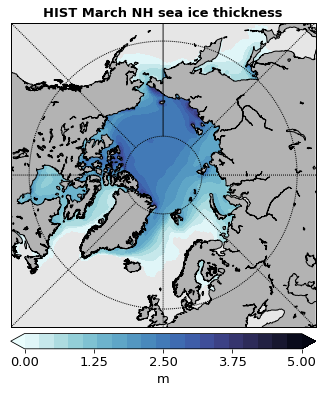

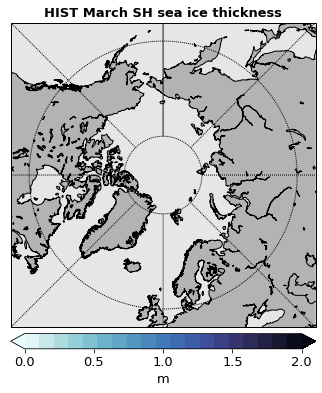

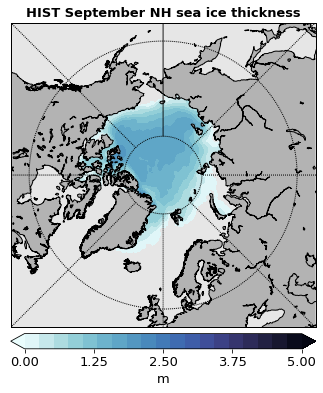

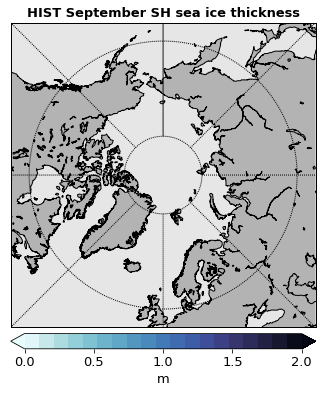

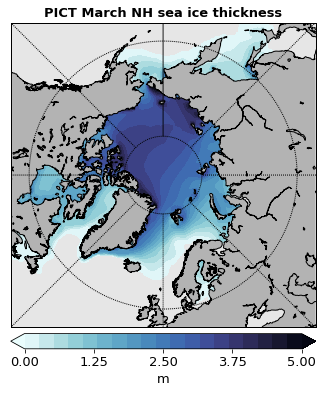

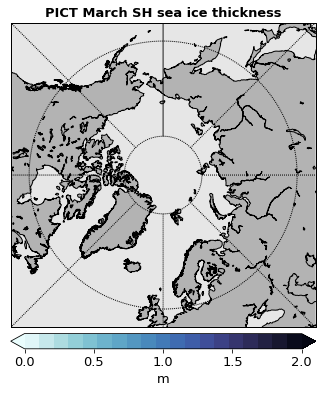

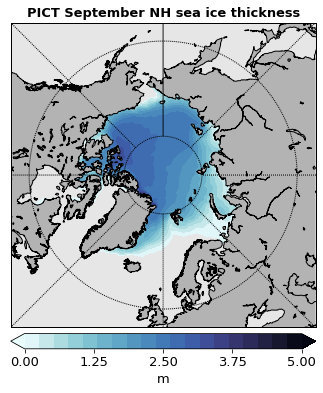

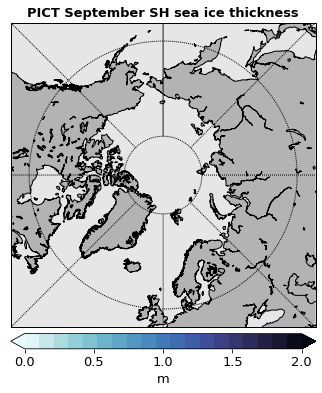

In [6]:
# set the paths to the results, runid, etc.

for exp in ['HIST','PICT']:

    result_path ='/p/largedata/hhb19/jstreffi/runtime/awicm-3.1/'+exp+'/outdata/fesom/'
    if exp == 'HIST':
        year_start = 1990
        year_end = 2014
    elif exp == 'PICT':
        year_start = 1850
        year_end = 2014
        
    runid ='fesom'
    str_id='m_ice'
    cor_id='a_ice'
    
    for season in [2,8]:
        if season == 2:
            name_season = 'March'
        elif season == 8:
            name_season = 'September'
            
        # specify depth, records and year to read
        depth, records, year_start, year_end=0, np.linspace(season,season,1).astype(int), year_start, year_end
        # get the closest model deprecordsth to the desired one
        data_total = [0 for x in range(mesh_n_points)]
        conc_total = [0 for x in range(mesh_n_points)]


        # read the model result from str_id.XXXX.nc
        for y in tqdm(range(year_start, year_end)): 
            data=read_fesom_slice(str_id, records, y, mesh, result_path, runid, ilev=0)
            data_total = data_total + data
            conc=read_fesom_slice(cor_id, records, y, mesh, result_path, runid, ilev=0)
            conc_total = conc_total +conc
        data_avg = data_total/len(range(year_start, year_end))
        conc_avg = conc_total/len(range(year_start, year_end))

        # choose the colorbar and plot the data
        cmap=cmo.ice_r
            
        for hemi in ['NH','SH']:
            if hemi == 'SH':
                proj='sp'
                cbartext, cont = 'm', [-0., 2, .2]
            elif hemi == 'NH':
                proj='np'
                cbartext, cont = 'm', [-0., 5, .5]
                

            fig =plt.figure(figsize=(6,6))

            # remove areas where mean thickness is very low
            data_avg = data_avg #/ conc_avg
            data_avg[conc_avg<0.05]=np.nan

            if hemi == 'SH':
                data_avg[mesh.y2>0]=np.nan

            [im, map, cbar]=ftriplot(mesh, data_avg, np.linspace(cont[0], cont[1], 20), oce=proj, cmap=cmap)
            cbar.set_label(cbartext, fontsize=13)
            cbar.set_ticks([round(i,7) for i in np.linspace(cont[0], cont[1], 5)])
            cbar.ax.tick_params(labelsize=13)
            plt.title(exp+ " "+name_season+" "+hemi+" sea ice thickness", fontsize=13,fontweight='bold')

            plt.savefig(exp+ "_"+name_season+"_"+hemi+"_sea_ice_thickness.png",dpi=300,bbox_inches='tight')

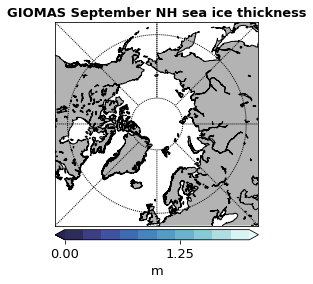

In [17]:
# Plot GIOMAS
#cmap = cmo.ice
import cmocean as cmo

#levels = np.linspace(0,100,11).astype(int)
#factor=100
new_cmap = truncate_colormap(cmo.cm.ice, 0.15, 1)
extend='both'

# Load model data
import xarray as xr
from collections import OrderedDict

import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

for exp in ['GIOMAS']:
    path ='/p/project/chhb19/streffing1/obs/GIOMAS/GIOMAS_heff_miss_time_mon.nc'
    if exp == 'GIOMAS':
        var = 'heff'
        year_start = 1990
        year_end = 2008
        
# Load model Data
data = OrderedDict()
paths = []

intermediate = []
intermediate = xr.open_mfdataset(path, combine="by_coords", engine="netcdf4", use_cftime=True)
data[var] = intermediate.compute()
data2=data[var]

x = np.asarray(data2.lon_scaler).flatten()
y = np.asarray(data2.lat_scaler).flatten()

for name_season in ['September']:
    if name_season == 'March':
        month=3
    elif name_season == 'September':
        month=9
    heff = np.asarray(data2.heff.fillna(0)[month,:,:]).flatten()
    #heff = np.ma.array(heff, mask=heff < 0.05)
    for hemi in ['NH']:

        # Format for contourf
        fig, ax =plt.subplots(nrows=1)
        
        # Defaults
        do_cbar=True,
        mlabels=[0, 0, 0, 0]
        plabels=[0, 0, 0, 0]
        extend='both'
        data_on_elem=0

        if hemi == "NH":
            cont=[0,5]
            contours=np.linspace(cont[0], cont[1], 11)
            map = Basemap(projection="nplaea", boundinglat=50, lon_0=0, resolution="l")
            map.drawcoastlines()
            map.drawparallels(np.arange(-80.0, 81.0, 45.0), labels=plabels)
            map.drawmeridians(np.arange(-180.0, 181.0, 45.0), labels=mlabels)  # [0,1,0,0]
            #map.drawmapboundary(fill_color="0.9")
            map.fillcontinents(color=".7", lake_color=".7")
            #im = map.contourf(x, y, heff, tri=True, latlon=True, levels=contours, cmap=new_cmap, extend=extend, zorder=0)
            #co = ax.tricontour(x, y, heff, levels=contours, linewidths=2, colors='k')
            co = map.contour(x, y, heff, tri=True, latlon=True, levels=contours, extend=extend, colors='black', linewidths=2,zorder=1)
            if do_cbar:
                cbar = map.colorbar(im, "bottom", size="5%", pad="2%")
        elif hemi == "SH":
            cont=[0,2]
            contours=np.linspace(cont[0], cont[1], 11)
            map = Basemap(projection="splaea", boundinglat=-60, lon_0=180, resolution="l")
            map.drawcoastlines()
            map.drawparallels(np.arange(-80.0, 81.0, 45.0), labels=plabels)
            map.drawmeridians(np.arange(-180.0, 181.0, 45.0), labels=mlabels)  # [0,1,0,0]
            map.drawmapboundary(fill_color="0.9")
            map.fillcontinents(color=".7", lake_color=".7")
            im = map.contourf(
                x, y, heff, tri=True, latlon=True, levels=contours, cmap=new_cmap, extend=extend
            )

            if do_cbar:
                cbar = map.colorbar(im, "bottom", size="5%", pad="2%")
        cbar.set_label(cbartext, fontsize=13)
        cbar.set_ticks([round(i,7) for i in np.linspace(cont[0], cont[1], 5)])
        cbar.ax.tick_params(labelsize=13)
        plt.title(exp+ " "+name_season+" "+hemi+" sea ice thickness", fontsize=13,fontweight='bold')

        plt.savefig(exp+ "_"+name_season+"_"+hemi+"_sea_ice_thickness.png",dpi=300,bbox_inches='tight')


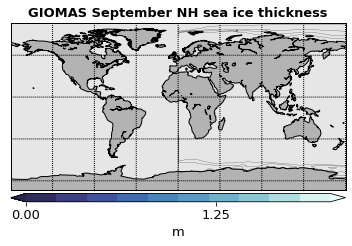

In [26]:
# Plot GIOMAS
#cmap = cmo.ice
import cmocean as cmo

#levels = np.linspace(0,100,11).astype(int)
#factor=100
new_cmap = truncate_colormap(cmo.cm.ice, 0.15, 1)
extend='both'

# Load model data
import xarray as xr
from collections import OrderedDict

import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

for exp in ['GIOMAS']:
    path ='/p/project/chhb19/streffing1/obs/GIOMAS/GIOMAS_heff_miss_time_mon.nc'
    if exp == 'GIOMAS':
        var = 'heff'
        year_start = 1990
        year_end = 2008
        
# Load model Data
data = OrderedDict()
paths = []

intermediate = []
intermediate = xr.open_mfdataset(path, combine="by_coords", engine="netcdf4", use_cftime=True)
data[var] = intermediate.compute()
data2=data[var]

x = np.asarray(data2.lon_scaler).flatten()
y = np.asarray(data2.lat_scaler).flatten()

for name_season in ['September']:
    if name_season == 'March':
        month=3
    elif name_season == 'September':
        month=9
    heff = np.asarray(data2.heff.fillna(0)[month,:,:]).flatten()
    #heff = np.ma.array(heff, mask=heff < 0.05)
    for hemi in ['NH']:

        # Format for contourf
        fig, ax =plt.subplots(nrows=1)
        
        # Defaults
        do_cbar=True,
        mlabels=[0, 0, 0, 0]
        plabels=[0, 0, 0, 0]
        extend='both'
        data_on_elem=0

        if hemi == "NH":
            cont=[0,5]
            contours=np.linspace(cont[0], cont[1], 11)
            map = Basemap(projection='cyl',resolution='c')
            map.drawcoastlines()
            map.drawparallels(np.arange(-80.0, 81.0, 45.0), labels=plabels)
            map.drawmeridians(np.arange(-180.0, 181.0, 45.0), labels=mlabels)  # [0,1,0,0]
            map.drawmapboundary(fill_color="0.9")
            map.fillcontinents(color=".7", lake_color=".7")
            #im = map.contourf(x, y, heff, tri=True, latlon=True, levels=contours, cmap=new_cmap, extend=extend, zorder=0)
            co = ax.tricontour(x, y, heff, levels=contours, linewidths=.2, colors='k')
            #co = map.contour(x, y, heff, tri=True, latlon=True, levels=contours, extend=extend, colors='black', linewidths=2,zorder=1)
            if do_cbar:
                cbar = map.colorbar(im, "bottom", size="5%", pad="2%")
        elif hemi == "SH":
            cont=[0,2]
            contours=np.linspace(cont[0], cont[1], 11)
            map = Basemap(projection="splaea", boundinglat=-60, lon_0=180, resolution="l")
            map.drawcoastlines()
            map.drawparallels(np.arange(-80.0, 81.0, 45.0), labels=plabels)
            map.drawmeridians(np.arange(-180.0, 181.0, 45.0), labels=mlabels)  # [0,1,0,0]
            map.drawmapboundary(fill_color="0.9")
            map.fillcontinents(color=".7", lake_color=".7")
            im = map.contourf(
                x, y, heff, tri=True, latlon=True, levels=contours, cmap=new_cmap, extend=extend
            )

            if do_cbar:
                cbar = map.colorbar(im, "bottom", size="5%", pad="2%")
        cbar.set_label(cbartext, fontsize=13)
        cbar.set_ticks([round(i,7) for i in np.linspace(cont[0], cont[1], 5)])
        cbar.ax.tick_params(labelsize=13)
        plt.title(exp+ " "+name_season+" "+hemi+" sea ice thickness", fontsize=13,fontweight='bold')

        plt.savefig(exp+ "_"+name_season+"_"+hemi+"_sea_ice_thickness.png",dpi=300,bbox_inches='tight')
